Kaggle Competition :
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/leaderboard#

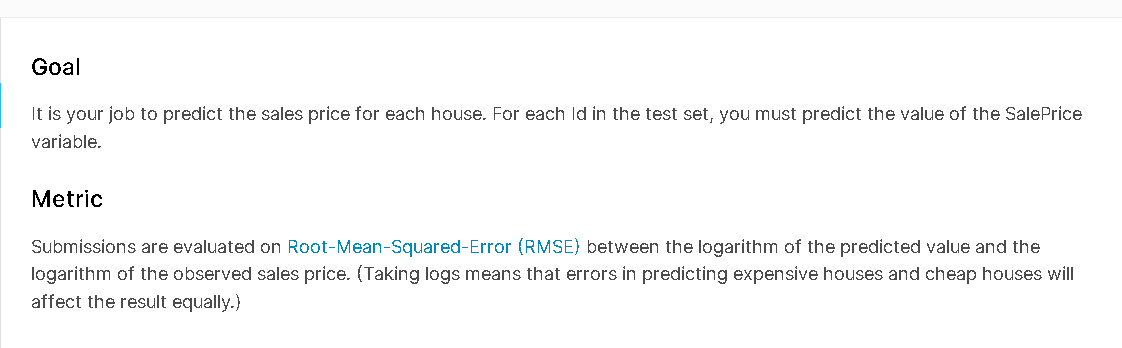

In [756]:
import pandas as pd
import numpy as np
data = pd.read_csv('train (1).csv')
test_data = pd.read_csv('test (2).csv')
data = pd.concat([data, test_data], axis = 0)

In [757]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Defining categorical and numerical features

In [758]:
dtypes = data.dtypes

In [759]:
dt_cat = dtypes[data.dtypes == object]

In [760]:
dt_cat

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [761]:
mask = (dtypes == np.int64) | (dtypes == np.float64)
dt_num = dtypes[mask]

In [762]:
dt_num

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [763]:
print(len(dtypes), len(dt_cat) + len(dt_num))

81 81


In [764]:
cat_cols = dt_cat.index
cat_cols = cat_cols.to_series()
num_cols = dt_num.index
num_cols = num_cols.to_series()

Preparing the data

In [765]:
data[num_cols] = data[num_cols].fillna(-1)
data[cat_cols] = data[cat_cols].fillna('empty')

In [766]:
data.isna().any().sum()

0

In [767]:
nums = pd.DataFrame()
for col in num_cols[:37]:
  nums[col] = round((data[col] - data[col].mean())/data[col].std(), 6)

In [768]:
dummies = pd.get_dummies(data[cat_cols])

In [769]:
new_data = pd.concat([nums, dummies], axis = 1)
target = pd.DataFrame(data['SalePrice'][:1460])
train_data = new_data[:1460]

Lasso model

In [770]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(train_data, target)

In [771]:
clf = Lasso()
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+11, tolerance: 6.727e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso()

Score

In [772]:
clf.score(x_test, y_test)

0.8891509641164969

csv file for kaggle

In [774]:
result = pd.DataFrame(columns = ['SalePrice'], index = data['Id'][1460:])
result['SalePrice']  = clf.predict(new_data[1460:])
result.to_csv('subm.csv', index_label = 'Id')

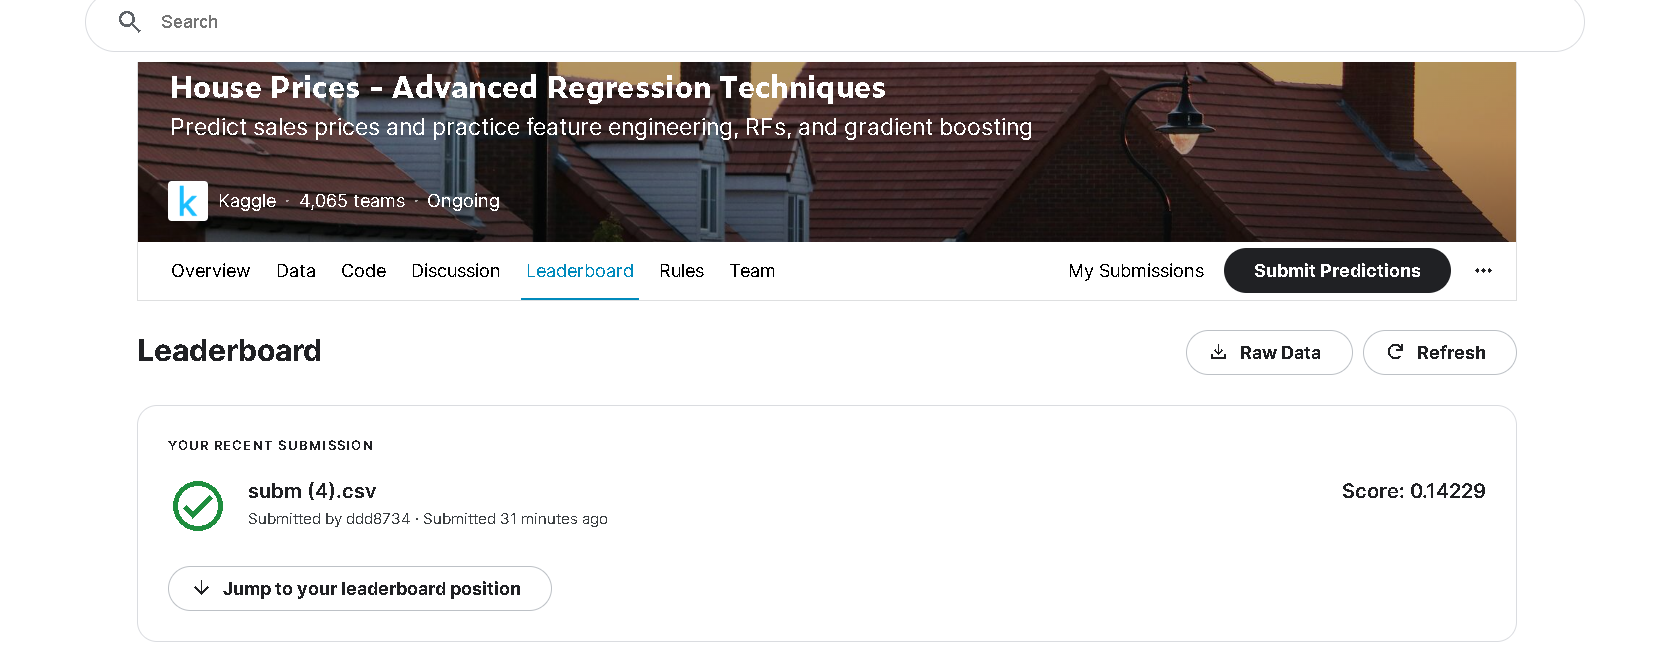